# NaCl example

#### Import required packages

In [1]:
%matplotlib inline
from mantid.simpleapi import *
import matplotlib.pyplot as plt
from mantid import plots

Set a larger default figure size

In [2]:
plt.rcParams['figure.figsize'] = [15, 12]

#### Set IPTS number

In [ ]:
ipts = 7776

#### Load data and vanadium
###### Data is loaded into a MDHistoWorkspace that have dimensions corresponding to x pixels, y pixels and sample rotation

In [ ]:
LoadWANDSCD(IPTS=ipts, RunNumbers=26509, OutputWorkspace='norm',Grouping='4x4') # Vanadium
LoadWANDSCD(IPTS=ipts, RunNumbers='26640-27944', OutputWorkspace='data',Grouping='4x4')

##### Integrate out a slice of data in the y (verticle) pixels. Only 2D can be plotted using `mantid` projections.

In [ ]:
data_slice = IntegrateMDHistoWorkspace('data',P1Bin=[60,69])

#### plot the data slice

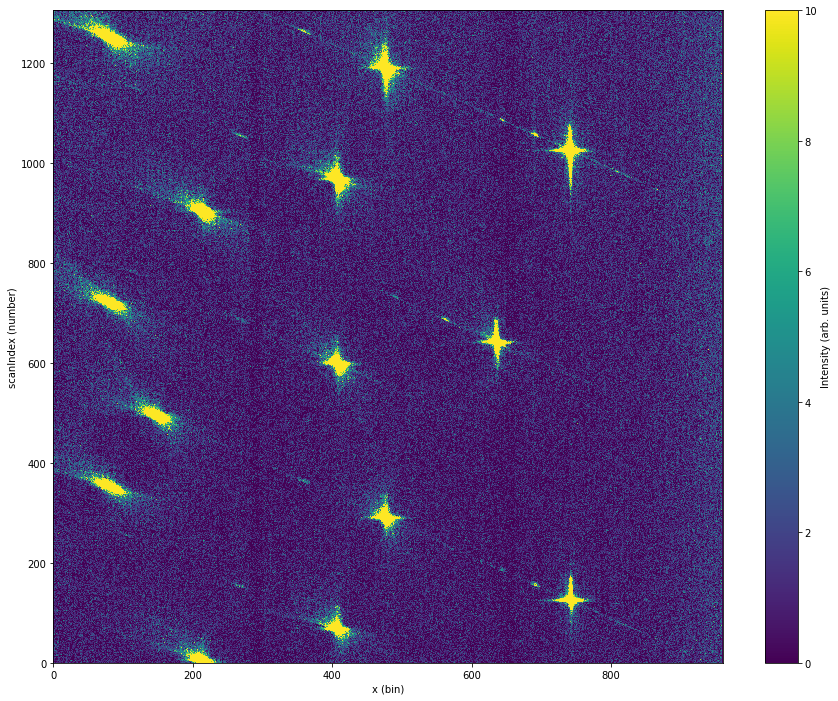

In [157]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(data_slice, vmax=10, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

#### Convert the data to Q space

In [19]:
ConvertWANDSCDtoQ(InputWorkspace='data',
                  NormalisationWorkspace='norm',
                  OutputWorkspace='Q')

MDHistoWorkspace
Title: 
Dim 0: (Q_sample_x) -8.02 to 8.02 in 401 bins
Dim 1: (Q_sample_y) -0.82 to 0.82 in 41 bins
Dim 2: (Q_sample_z) -8.02 to 8.02 in 401 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /home/rwp/mantid/instrument/WAND_Definition_2018_04_01.xml

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-02 13:34:10
Run end:  not available
Sample: a 5.6, b 5.6, c 5.6; alpha 90, beta 90, gamma 90


In [22]:
q_slice = IntegrateMDHistoWorkspace('Q',P2Bin=[-0.05,0.05])

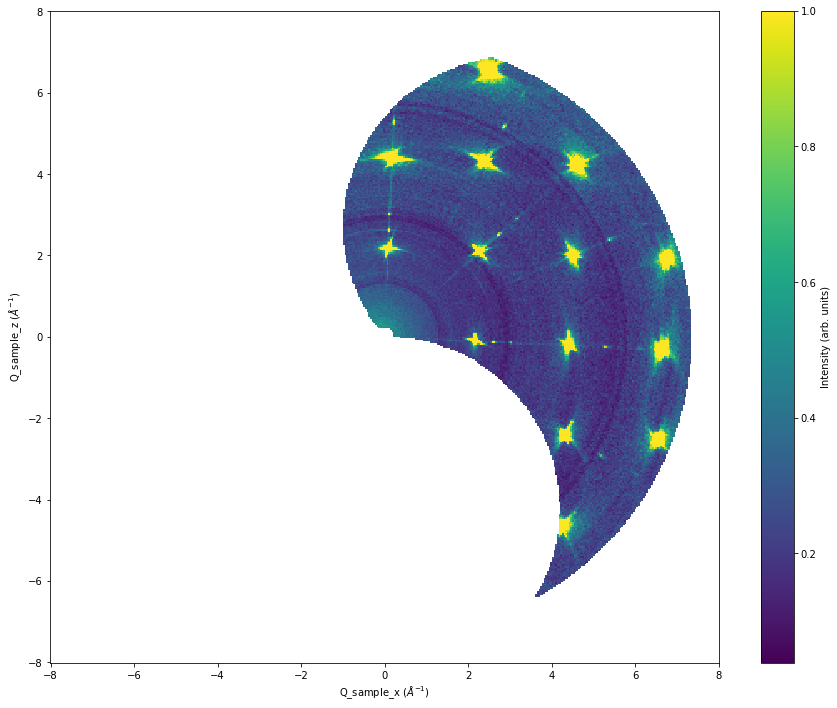

In [158]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(q_slice, vmax=1, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

#### Find Peaks and UB matrix

In [24]:
FindPeaksMD(InputWorkspace='Q',
            PeakDistanceThreshold=2,
            CalculateGoniometerForCW=True,
            OutputWorkspace='peaks')

PeaksWorkspace
Columns: 18
Rows: 14
5 kB
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /home/rwp/mantid/instrument/WAND_Definition_2018_04_01.xml

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-02 13:34:10
Run end:  not available
Sample: a 5.6, b 5.6, c 5.6; alpha 90, beta 90, gamma 90
Inelastic: ki-kf

In [141]:
peaks = mtd['peaks']
peaks_x = []
peaks_z = []
for n in range(peaks.getNumberPeaks()):
    p = peaks.getPeak(n)
    print(n, p.getQSampleFrame())
    x, y, z = p.getQSampleFrame()
    peaks_x.append(x)
    peaks_z.append(z)

(0, [2.40072,0.00130687,4.32033])
(1, [0.0797918,0.0443599,2.19919])
(2, [0.199355,0.00130686,4.39905])
(3, [2.28012,0.00130687,2.12004])
(4, [2.19919,0.0443599,-0.0798074])
(5, [4.44026,0.0443535,-0.200246])
(6, [4.5198,0.00130687,2.00003])
(7, [4.64062,-0.0394743,4.23993])
(8, [4.32033,0.00130687,-2.40073])
(9, [2.52035,-0.0394745,6.56007])
(10, [6.76027,-0.0394745,1.91975])
(11, [4.23991,0.00130686,-4.64082])
(12, [6.68031,-0.0394744,-0.320462])
(13, [6.56011,0.00130686,-2.52058])


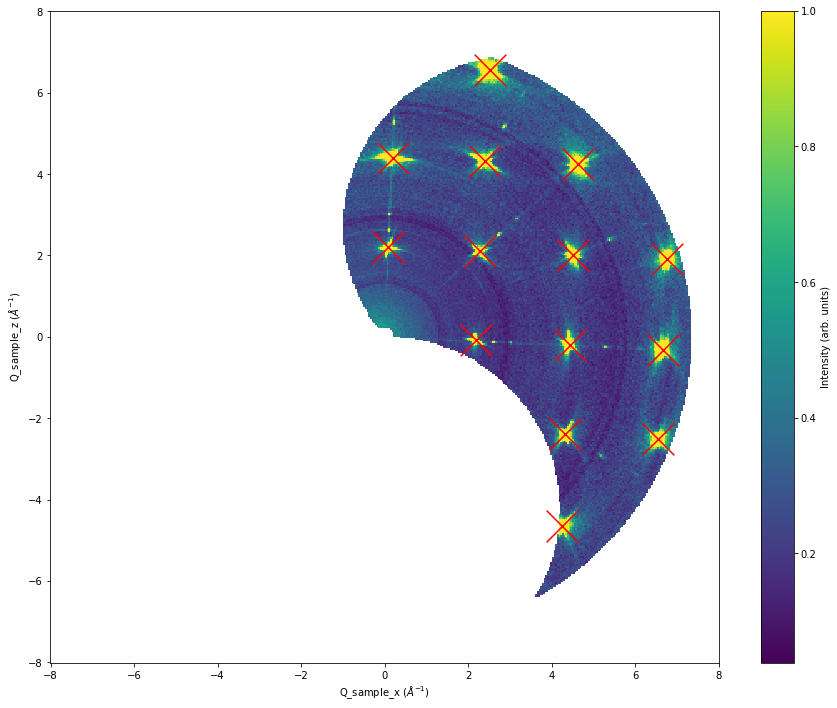

In [183]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(q_slice, vmax=1, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')
ax.scatter(peaks_x,peaks_z,marker='x',c='r',s=1000)

In [37]:
FindUBUsingLatticeParameters(PeaksWorkspace='peaks',
                             a=5.64, b=5.64, c=5.64,
                             alpha=90, beta=90, gamma=90)
print("Found UB:\n{}\nusing {}".format(mtd['peaks'].sample().getOrientedLattice().getUB(),
                                       mtd['peaks'].sample().getOrientedLattice()))

Found UB:
[[ -2.73152432e-17   1.77061974e-01  -9.27942487e-03]
 [  1.77304965e-01   0.00000000e+00   0.00000000e+00]
 [  1.23032284e-17  -9.27942487e-03  -1.77061974e-01]]
using UnitCell with lattice parameters: a = 5.64 b = 5.64 c = 5.64 alpha = 90 beta = 90 gamma = 90


In [217]:
IndexPeaks('peaks')

IndexPeaks_returns(NumIndexed=14, AverageError=0.025078645429515746)

In [218]:
peaks = mtd['peaks']
for n in range(peaks.getNumberPeaks()):
    p = peaks.getPeak(n)
    print(n, p.getHKL(), p.getQSampleFrame())

(0, [0,2,-4], [2.40072,0.00130687,4.32033])
(1, [0,-0,-2], [0.0797918,0.0443599,2.19919])
(2, [0,-0,-4], [0.199355,0.00130686,4.39905])
(3, [0,2,-2], [2.28012,0.00130687,2.12004])
(4, [0,2,-0], [2.19919,0.0443599,-0.0798074])
(5, [0,4,-0], [4.44026,0.0443535,-0.200246])
(6, [0,4,-2], [4.5198,0.00130687,2.00003])
(7, [-0,4,-4], [4.64062,-0.0394743,4.23993])
(8, [0,4,2], [4.32033,0.00130687,-2.40073])
(9, [-0,2,-6], [2.52035,-0.0394745,6.56007])
(10, [-0,6,-2], [6.76027,-0.0394745,1.91975])
(11, [0,4,4], [4.23991,0.00130686,-4.64082])
(12, [-0,6,-0], [6.68031,-0.0394744,-0.320462])
(13, [0,6,2], [6.56011,0.00130686,-2.52058])


#### Convert to HKL

If you used the sample alignment tool then the UB will already be on the workspace and you dont need to find it

In [165]:
ConvertWANDSCDtoQ(InputWorkspace='data',
                  NormalisationWorkspace='norm',
                  UBWorkspace='peaks',
                  OutputWorkspace='HKL',
                  Frame='HKL',
                  BinningDim0='-0.52,0.52,51',
                  BinningDim1='-7.52,7.52,751',
                  BinningDim2='-7.52,7.52,751')

MDHistoWorkspace
Title: 
Dim 0: ([H,0,0]) -0.52 to 0.52 in 51 bins
Dim 1: ([0,K,0]) -7.52 to 7.52 in 751 bins
Dim 2: ([0,0,L]) -7.52 to 7.52 in 751 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /home/rwp/mantid/instrument/WAND_Definition_2018_04_01.xml

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-02 13:34:10
Run end:  not available
Sample: a 5.6, b 5.6, c 5.6; alpha 90, beta 90, gamma 90


In [166]:
hk0 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.02,0.02])

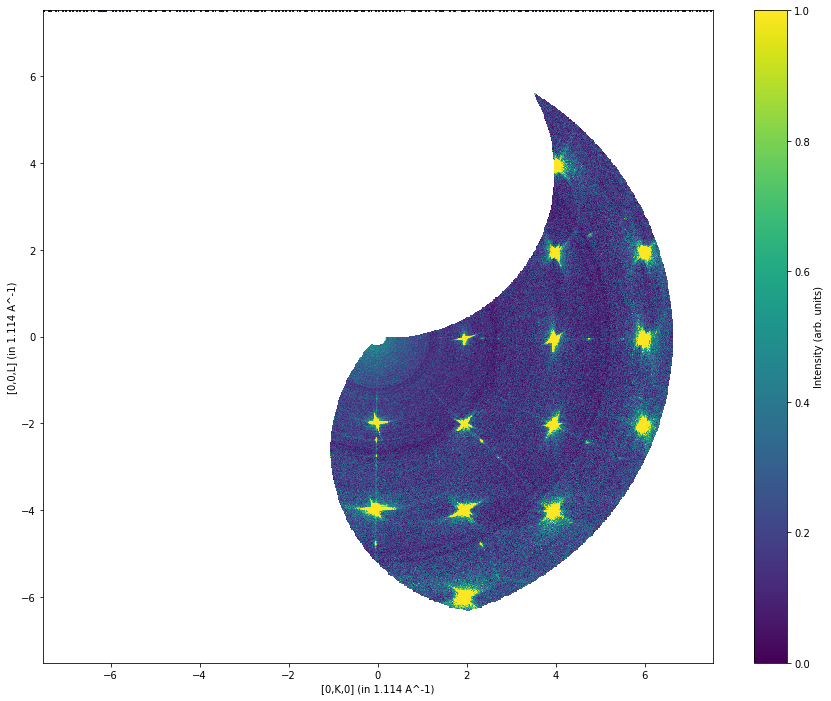

In [173]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk0, vmax=1, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [168]:
hk0_2 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.5,0.5])

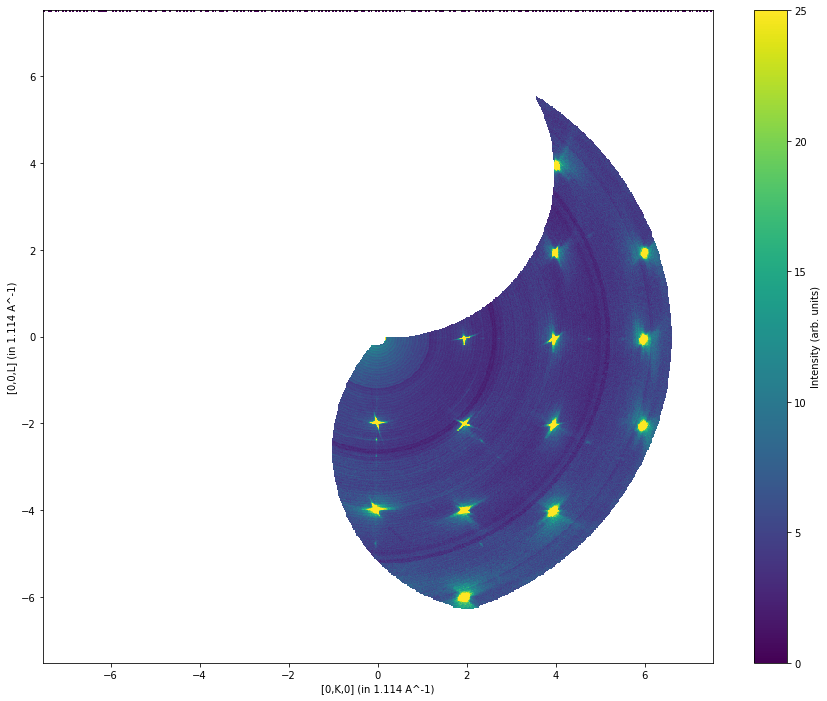

In [174]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk0_2, vmax=25, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [175]:
h00 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[-0.1,0.1])
h00 = ConvertMDHistoToMatrixWorkspace(h00)

In [176]:
h20 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[1.9,2.1])
h20 = ConvertMDHistoToMatrixWorkspace(h20)

In [177]:
h40 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[3.9,4.1])
h40 = ConvertMDHistoToMatrixWorkspace(h40)

In [178]:
h60 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[5.9,6.1])
h60 = ConvertMDHistoToMatrixWorkspace(h60)

(-6.5, 2.5)

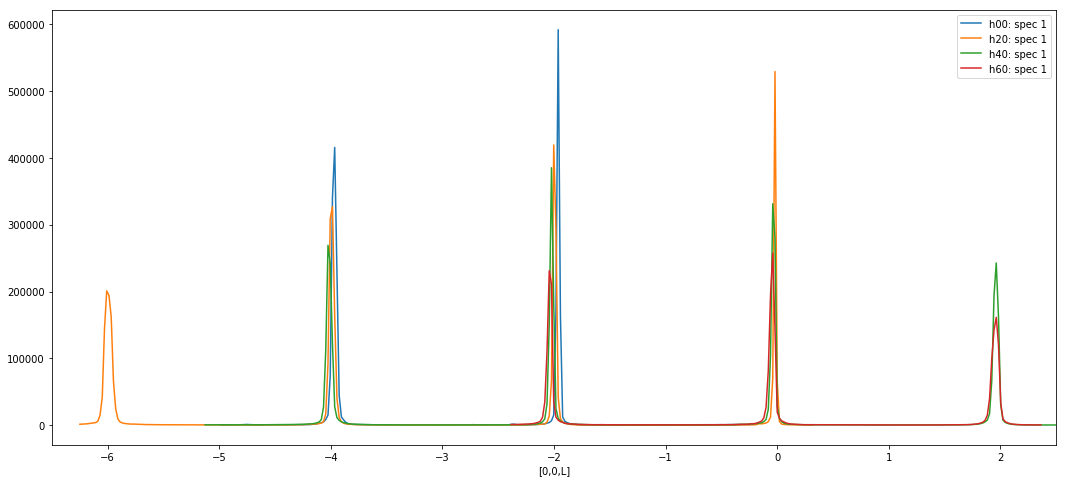

In [179]:
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(h00)
ax.plot(h20)
ax.plot(h40)
ax.plot(h60)
ax.legend()
ax.set_xlim(-6.5,2.5)

(-2.5, 0.5)

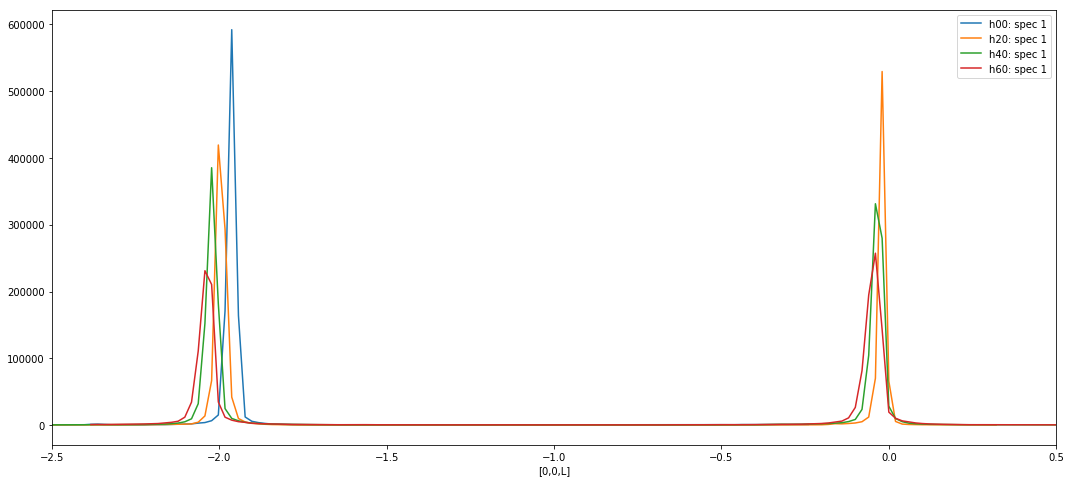

In [180]:
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(h00)
ax.plot(h20)
ax.plot(h40)
ax.plot(h60)
ax.legend()
ax.set_xlim(-2.5,0.5)

In [190]:
h200 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[-0.1,0.1],P3Bin=[-3,0,-1])
h200 = ConvertMDHistoToMatrixWorkspace(h200)
h400 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[-0.1,0.1],P3Bin=[-5,0,-3])
h400 = ConvertMDHistoToMatrixWorkspace(h400)

/usr/lib/python2.7/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


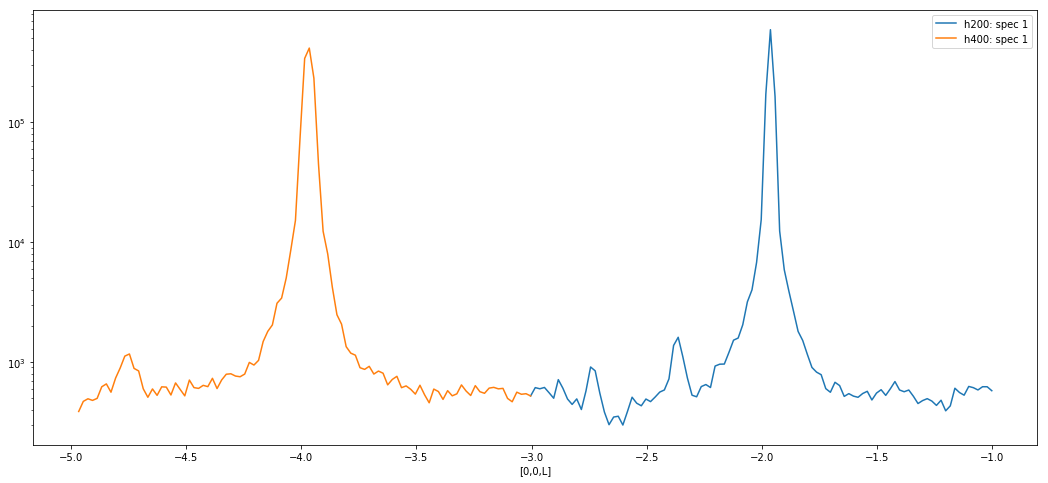

In [195]:
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(h200)
ax.plot(h400)
ax.legend()
ax.set_yscale('log')


In [197]:
h020 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[1.9,2.1],P3Bin=[-1,0,1])
h020 = ConvertMDHistoToMatrixWorkspace(h020)
h220 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[1.9,2.1],P3Bin=[-3,0,-1])
h220 = ConvertMDHistoToMatrixWorkspace(h220)
h420 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[1.9,2.1],P3Bin=[-5,0,-3])
h420 = ConvertMDHistoToMatrixWorkspace(h420)
h620 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[1.9,2.1],P3Bin=[-7,0,-5])
h620 = ConvertMDHistoToMatrixWorkspace(h620)

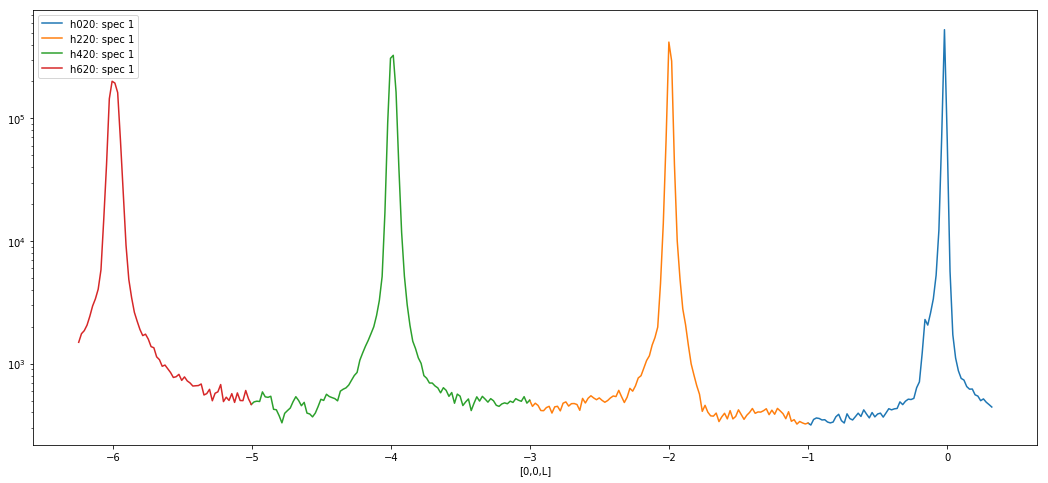

In [203]:
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(h020)
ax.plot(h220)
ax.plot(h420)
ax.plot(h620)
ax.legend()
ax.set_yscale('log')

In [207]:
h240 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[3.9,4.1],P3Bin=[1,0,3])
h240 = ConvertMDHistoToMatrixWorkspace(h240)
h040 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[3.9,4.1],P3Bin=[-1,0,1])
h040 = ConvertMDHistoToMatrixWorkspace(h040)
hn240 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[3.9,4.1],P3Bin=[-3,0,-1])
hn240 = ConvertMDHistoToMatrixWorkspace(hn240)
hn440 = IntegrateMDHistoWorkspace('HKL',P1Bin=[-0.1,0.1],P2Bin=[3.9,4.1],P3Bin=[-5,0,-3])
hn440 = ConvertMDHistoToMatrixWorkspace(hn440)

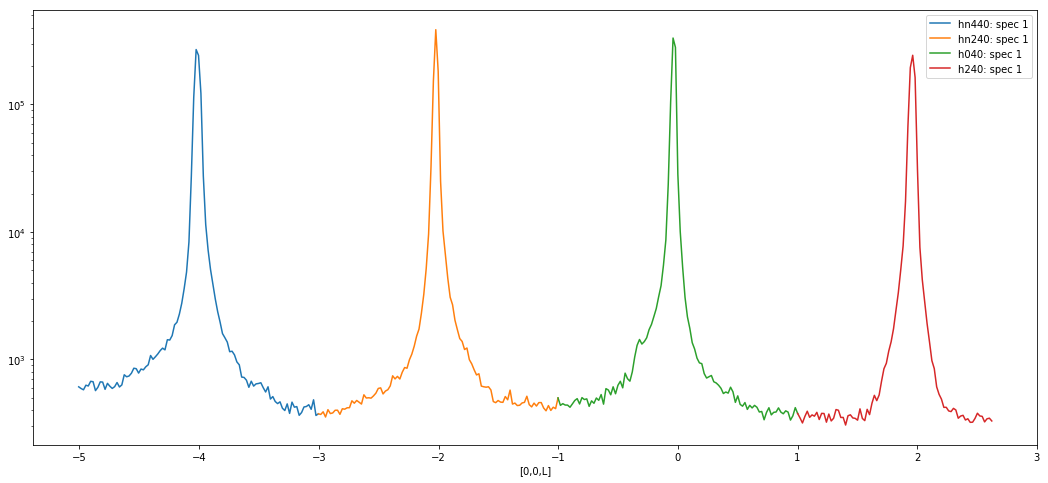

In [208]:
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
ax.plot(hn440)
ax.plot(hn240)
ax.plot(h040)
ax.plot(h240)
ax.legend()
ax.set_yscale('log')


## See also

* [LoadWANDSCD](http://docs.mantidproject.org/nightly/algorithms/LoadWANDSCD.html)
* [ConvertWANDSCDtoQ](http://docs.mantidproject.org/nightly/algorithms/ConvertWANDSCDtoQ.html)
* [IntegrateMDHistoWorkspace](http://docs.mantidproject.org/nightly/algorithms/IntegrateMDHistoWorkspace.html)
* [Introduction to Matplotlib in Mantid](http://docs.mantidproject.org/nightly/plotting/)
* [mantid.plots](http://docs.mantidproject.org/nightly/api/python/mantid/plots/)